In [5]:
import numpy as np, math, cmath, networkx

In [14]:
def polar(number:complex):
    module = abs(number)
    angle = np.rad2deg(np.arctan2(number.imag,number.real))

    return module,angle
def retangular(number:tuple[float,float]):
    return cmath.rect(number[0],np.deg2rad(number[1]))

def paralelo(*args):
    resultado = args[0]*args[1]/(args[0]+args[1])
    for c in args[2:]:
        resultado = resultado*c/(resultado+c)
    return resultado

def calcula_corrente(potencia_base,tensao_base):
    return potencia_base/(3**.5 * tensao_base)

def angulo_fp(fp,indutivo = True):
    return np.rad2deg(np.arccos(fp)) * (-1 if indutivo else 1)

def novo_angulo_excitacao(tensao_gerador,angulo_gerador,diferenca):

    # e1 sen1 = e2 sen2
    sen2 = abs(tensao_gerador)*np.sin(np.deg2rad(angulo_gerador))/((1+diferenca)*abs(tensao_gerador))
    gama2 = np.rad2deg(np.arcsin(sen2))
    return gama2

def potencia_ativa(tensao_terminal,tensao_gerador,reatancia,angulo_gerador):
    return abs(tensao_terminal)*abs(tensao_gerador)/abs(reatancia) * np.sin(np.deg2rad(angulo_gerador))

def potencia_reativa(tensao_terminal,tensao_gerador,reatancia,angulo_gerador):
    return abs(tensao_terminal)/abs(reatancia) * (abs(tensao_gerador)*np.cos(np.deg2rad(angulo_gerador))-abs(tensao_terminal))

def calcula_z_base(tensao_base_antiga,tensao_base_nova,potencia_base_antiga,potencia_base_nova,reatancia):
    '''
    Alteração de Z do transformador para nova base em p.u
    z' = z*nova_base/antiga_base*(vb_nova/vb_anterior)**2
    '''
    zb = 1j*reatancia*(potencia_base_nova/potencia_base_antiga)*(tensao_base_antiga/tensao_base_nova)**2
    return zb

# 3.2

In [ ]:
s = 635e6
angulo = angulo_fp(.9)
angulo

-25.841932763167126

In [ ]:
rpm = 3600
polos = 7200/rpm # 2 polos 3600 rpm, 4 polos 1800 rpm
v = 24e3
vb=va = 1

ls = 2.7656e-3
ms = 1.382e-3
r = 0
f = polos/2 * rpm/60

zd = r + (2j*np.pi*f)*(ls+ms)
# s = v²/z
zbase = v**2/s
zd_base = zd/zbase
zd_base

#ibase
i = retangular((1,angulo))
polar(i)

(1.0, -25.841932763167126)

In [ ]:
zd_base

1.7237696360767563j

In [ ]:
ei = va + i*zd_base
polar(ei)

(2.3396857240622477, 41.53499550218859)

# Ex 3.3

In [ ]:
s = 635e6
rpm = 3600
v = 24e3
xd = 1.7241j #pu
vt = 1 #pu
ig = retangular((.8,angulo_fp(.9))) #pu

ei = vt + xd*ig
gama = polar(ei)[1]
polar(ei)

(2.0260409041698435, 37.78487091262951)

In [ ]:

p = potencia_ativa(vt,ei,xd,gama)
q = potencia_reativa(vt,ei,xd,gama)

p,q

(0.7200000000000001, 0.3487119154832541)

In [ ]:

gama2 = novo_angulo_excitacao(ei,gama,.2)
ei2 = ei*1.2
q2 = potencia_reativa(vt,ei2,xd,gama2)
gama2,q2

(30.70260369152057, 0.6324799257413339)

In [ ]:
gama3 = novo_angulo_excitacao(ei,gama,-.2)
ei3 = ei*.8
q3 = potencia_reativa(vt,ei3,xd,gama3)
gama3,q3

(49.984719486673605, 0.024466267443695663)

# Ex 3.8

In [ ]:
# Descobrir reatancias de cada gerador
zg1 = calcula_z_base(13.8,13.8,50e6,75e6,.25)
zg1


0.375j

In [ ]:
zg2 = calcula_z_base(13.8,13.8,25e6,75e6,.25)
zg2

0.75j

In [ ]:
# Kirchoff das correntes
# (vt-ei1) /.375j + (vt-ei2) /.75j + vt/.1j = 0, tal que ei1 = ei2
# 3Ei = 10.5Vt
# I'' = Vt/.1j = 3Ei/(10.5*.1j)
i2l = -2.735j
i1 = -2.735j*(.75/(.75+.375))
i2 = -2.735j*(.375/(.75+.375))
i1,i2

(-1.8233333333333333j, -0.9116666666666666j)

# Ex 3.12

In [ ]:
class Gerador:
    def __init__(self,s,v,xd):
        self.s = s
        self.v = v
        self.xd = xd
class Trafo:
    def __init__(self,vp,vs,s,xf) -> None:
        self.vp = vp
        self.vs = vs
        self.s = s
        self.xf = xf
        self.n = vp/vs # relação de transformação
g1 = Gerador(20e6,13.8e3,.2)
g2 = Gerador(30e6,18e3,.2)
g3 = Gerador(30e6,20e3,.2)
t1 = Trafo(220e3,13.8e3,25e6,.1)
t2 = Trafo(220e3,18e3,30e6,.1)
t3 = Trafo(220e3,22e3,35e6,.1)


In [ ]:
sb = 50e6
vbg1=13.8e3

xg1 = calcula_z_base(g1.v,t1.vs,g1.s,sb,g1.xd)
xg2 = calcula_z_base(g2.v,t2.vs,g2.s,sb,g2.xd)
xg3 = calcula_z_base(g3.v,t3.vs,g3.s,sb,g3.xd)

xg1,xg2,xg3

(0.5j, 0.33333333333333337j, 0.27548209366391185j)

In [ ]:
xt1 = calcula_z_base(t1.vs,t1.vs,t1.s,sb,t1.xf)
xt2 = calcula_z_base(t2.vs,t2.vs,t2.s,sb,t2.xf)
xt3 = calcula_z_base(t3.vs,t3.vs,t3.s,sb,t3.xf)

xt1,xt2,xt3

(0.2j, 0.16666666666666669j, 0.14285714285714288j)

In [ ]:
zb = 220**2/50 #Vlinha² / Sb => Impedância de linha base
xlt1 = 80j/zb
xlt2 = 100j/zb

xlt1,xlt2


(0.08264462809917356j, 0.10330578512396695j)

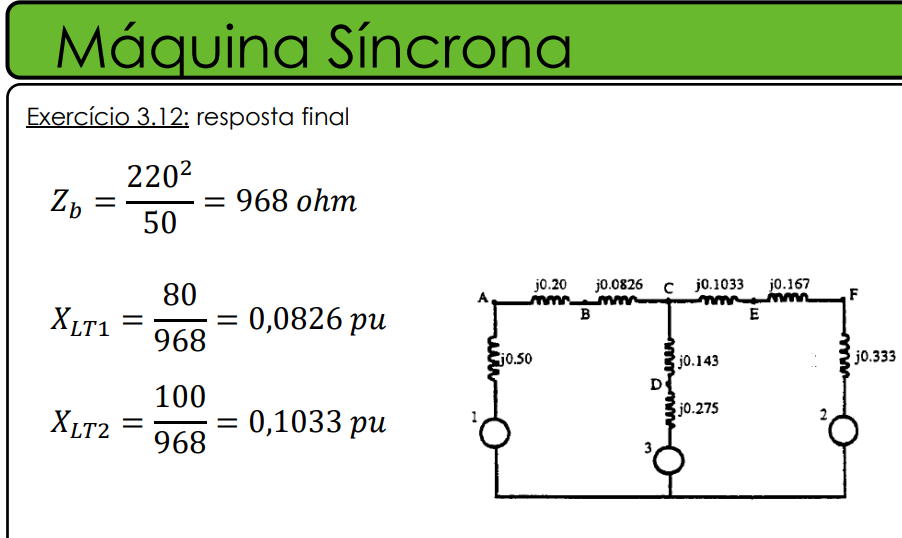

Em caso de curto-circuito trifasico em C, o ponto C se tornaria o referencial, deixando todas as impedâncias em paralelo

In [ ]:

xeq = paralelo((xg1+xt1)+xlt1,xg2+xt2+xlt2,xg3+xt3)

i = 1/xeq
i_f = polar(i)
i_f



(5.3256578750858345, -90.0)

# Ex 3.13

In [9]:
xl1 = .25j
xl2 = .2j
dv = .05 #a)
dfase = 3 #b)
c1 = 1/(1+dv)
c2 = retangular((1,-dfase))

In [11]:
zeq1 = xl1
zeq2 = xl2
yeq1 = 1/zeq1
yeq2 = 1/zeq2

y11 = yeq1
y22 = abs(c1)**2 * yeq1
y12 = y21 = -c1 * yeq1

maty1 = np.array([[y11,y12],[y21,y22]])
maty1

array([[0.-4.j        , 0.+3.80952381j],
       [0.+3.80952381j, 0.-3.62811791j]])

In [12]:
y11 = yeq2
y22 = abs(c2)**2 * yeq2
y12 = y21 = -c2*yeq2
maty2 = np.array([[y11,y12],[y21,y22]])
maty2

array([[0.        -5.j        , 0.26167978+4.99314767j],
       [0.26167978+4.99314767j, 0.        -5.j        ]])

# Exercicio 3.13 Thay

In [1]:
# EXERCÍCIO 3.13 - GLOVER
# está errado a parte 2 da letra A e B

import numpy as np
import math
import cmath

XL1 = 0.25
XL2 = 0.20
variacao_tensao = 0.05
modulo = 1
angulo_graus = 3
angulo_radianos = math.radians(angulo_graus)
c1 = 1 / (1 + variacao_tensao)
c2 = modulo * (cmath.cos(angulo_radianos) + 1j * cmath.sin(angulo_radianos))

# Cálculo da impedância equivalente para L1
Zeq_L1 = 1j * XL1
Yeq_L1 = 1 / Zeq_L1
Zeq_L2 = 1j * XL2
Yeq_L2 = 1 / Zeq_L2

# Montagem da matriz Y para L1
Y11_L1 = Yeq_L1
Y22_L1 = c1**2 * Yeq_L1
Y12_L1 = -c1 * Yeq_L1
Y21_L1 = -c1 * Yeq_L1

# Criando a matriz Y para L1
Y_L1 = np.array([[Y11_L1, Y12_L1],
                  [Y21_L1, Y22_L1]])

print("-----------LETRA A-----------")
print("--------------- - LETRA A - PARTE 1 --------------")
print(" ")
# Exibindo os resultados para L1
print("C1 = ", c1)
print(f"Yeq_L1 = {Yeq_L1:.4f}")
print(f"Y11 = {Y11_L1:.4f}")
print(f"Y22 = {Y22_L1:.4f}")
print(f"Y12 = {Y12_L1:.4f}")
print(f"Y21 = {Y21_L1:.4f}")
print(f"Y matriz = \n{Y_L1}")

# Montagem da matriz Y para L2
Y11_L2 = Yeq_L2
Y22_L2 = c1**2 * Yeq_L2
Y12_L2 = -c1 * Yeq_L2
Y21_L2 = -c1 * Yeq_L2

print(" ")
print("---------- LETRA A - PARTE 2 -----------")
print (" ")

# Criando a matriz Y para L2
Y_L2 = np.array([[Y11_L2, Y12_L2],
                  [Y21_L2, Y22_L2]])

# Exibindo os resultados para L2
print(f"C1 = {c1:.4f}")
print(f"Yeq_L2 = {Yeq_L2:.4f}")
print(f"Y11 = {Y11_L2:.4f}")
print(f"Y22 = {Y22_L2:.4f}")
print(f"Y12 = {Y12_L2:.4f}")
print(f"Y21 = {Y21_L2:.4f}")
print(f"Y matriz = \n{Y_L2}")

print(" ")
print("---------- LETRA B -----------")
print (" ")
print("--------------- PARTE 1 - LETRA B--------------")
print(" ")

# Montagem da matriz Y para L1
Y11_L1 = Yeq_L1
Y22_L1 = c2**2 * Yeq_L1
Y12_L1 = -c2 * Yeq_L1
Y21_L1 = -c2 * Yeq_L1

# Criando a matriz Y para L1
Y_L1 = np.array([[Y11_L1, Y12_L1],
                  [Y21_L1, Y22_L1]])

# Exibindo os resultados para L1
print("C2 = ", c2)
print(f"Yeq_L1 = {Yeq_L1:.4f}")
print(f"Y11 = {Y11_L1:.4f}")
print(f"Y22 = {Y22_L1:.4f}")
print(f"Y12 = {Y12_L1:.4f}")
print(f"Y21 = {Y21_L1:.4f}")
print(f"Y matriz = \n{Y_L1}")

# Montagem da matriz Y para L2
Y11_L2 = Yeq_L2
Y22_L2 = c2**2 * Yeq_L2
Y12_L2 = -c2 * Yeq_L2
Y21_L2 = -c2 * Yeq_L2

# Criando a matriz Y para L2
Y_L2 = np.array([[Y11_L2, Y12_L2],
                  [Y21_L2, Y22_L2]])
print(" ")
print("---------- PARTE 2 - LETRA B -----------")
print (" ")


# Exibindo os resultados para L2
print(f"C2 = {c2:.4f}")
print(f"Yeq_L2 = {Yeq_L2:.4f}")
print(f"Y11 = {Y11_L2:.4f}")
print(f"Y22 = {Y22_L2:.4f}")
print(f"Y12 = {Y12_L2:.4f}")
print(f"Y21 = {Y21_L2:.4f}")
print(f"Y matriz = \n{Y_L2}")

-----------LETRA A-----------
--------------- - LETRA A - PARTE 1 --------------
 
C1 =  0.9523809523809523
Yeq_L1 = 0.0000-4.0000j
Y11 = 0.0000-4.0000j
Y22 = 0.0000-3.6281j
Y12 = 0.0000+3.8095j
Y21 = 0.0000+3.8095j
Y matriz = 
[[0.-4.j         0.+3.80952381j]
 [0.+3.80952381j 0.-3.62811791j]]
 
---------- LETRA A - PARTE 2 -----------
 
C1 = 0.9524
Yeq_L2 = 0.0000-5.0000j
Y11 = 0.0000-5.0000j
Y22 = 0.0000-4.5351j
Y12 = 0.0000+4.7619j
Y21 = 0.0000+4.7619j
Y matriz = 
[[0.-5.j         0.+4.76190476j]
 [0.+4.76190476j 0.-4.53514739j]]
 
---------- LETRA B -----------
 
--------------- PARTE 1 - LETRA B--------------
 
C2 =  (0.9986295347545738+0.052335956242943835j)
Yeq_L1 = 0.0000-4.0000j
Y11 = 0.0000-4.0000j
Y22 = 0.4181-3.9781j
Y12 = -0.2093+3.9945j
Y21 = -0.2093+3.9945j
Y matriz = 
[[ 0.        -4.j         -0.20934382+3.99451814j]
 [-0.20934382+3.99451814j  0.41811385-3.97808758j]]
 
---------- PARTE 2 - LETRA B -----------
 
C2 = 0.9986+0.0523j
Yeq_L2 = 0.0000-5.0000j
Y11 = 0.0000-

# 4 da prova antiga

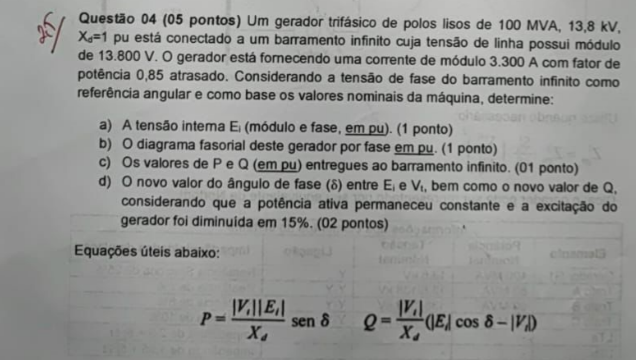

In [19]:
sb = 100e6
vb = 13.8e3
xd = 1j #pu
ig = 3300 #modulo
fp = .85 #indutivo

In [20]:
i_base = calcula_corrente(sb,vb)
i_base



4183.697602823375

In [22]:
v_pu = 1
i_pu = retangular((ig/i_base,angulo_fp(fp)))
ei_pu = xd*i_pu + v_pu
polar(ei_pu)

(1.5662676964329383, 25.344627040233497)